##  Mod03 Project - Northwind Company: Question 1

In [1]:
# Import Libraries:
from mod3_func import *

# Ploting Libraries:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# SQL
import sqlite3 
conn = sqlite3.connect('Northwind_small.sqlite')
cur = conn.cursor()

<b>Display Northwind Data Schema</b>

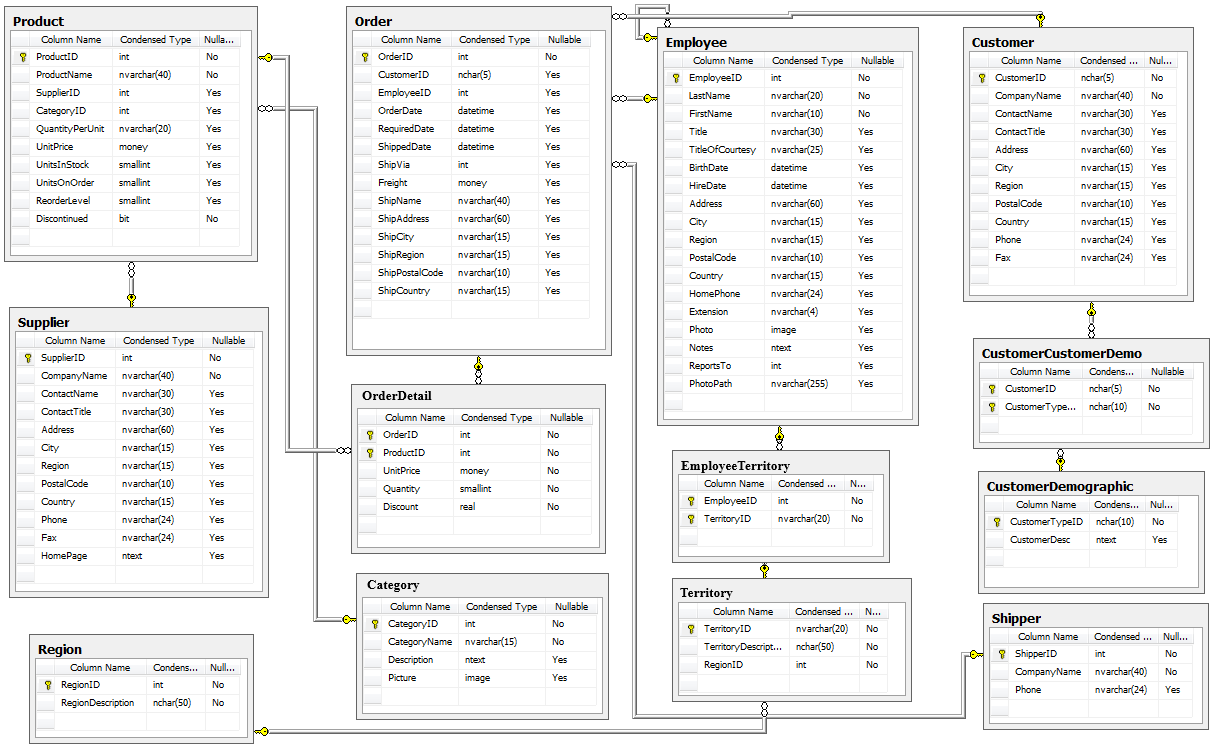

In [2]:
from IPython.display import Image
Image("Northwind_ERD.png")

# Does discount amount have a statistically significant effect on the quantity of a product in an order? If so, at what level(s) of discount?

<b>Null Hypothesis</b>

The number for products ordered is related to discount

$H_{0} : \mu_{No Dis} = \mu_{Yes Dis}$


<b>Alternative Hypothesis</b>

The number for products ordered is NOT related to discount

$H_{A} : \mu_{No Dis} \neq \mu_{Yes Dis}$


<b>Investigation Starting Point</b>

Using the `OrderDetail` table from the Schema above, as it contains all the information required to complete the analysis. Lets start by investigating the the `OrderDetail` table & splitting the data by discounted and non-discounted order items.

### Investigate Orders made by Northwind

In [3]:
cur.execute("""SELECT Id, OrderId, ProductId, UnitPrice, Quantity, (UnitPrice*Quantity) AS TotalPrice, Discount, 
                ((UnitPrice*Quantity)*(1-Discount)) AS SalePrice
                FROM [OrderDetail]
                """)
df_orders = pd.DataFrame(cur.fetchall())
df_orders.columns = [x[0] for x in cur.description]
df_orders.head()

,Id,OrderId,ProductId,UnitPrice,Quantity,TotalPrice,Discount,SalePrice
0,10248/11,10248,11,14.0,12,168.0,0.0,168.0
1,10248/42,10248,42,9.8,10,98.0,0.0,98.0
2,10248/72,10248,72,34.8,5,174.0,0.0,174.0
3,10249/14,10249,14,18.6,9,167.4,0.0,167.4
4,10249/51,10249,51,42.4,40,1696.0,0.0,1696.0


In [4]:
# Check for null values
df_orders.isna().sum()

Id            0
OrderId       0
ProductId     0
UnitPrice     0
Quantity      0
TotalPrice    0
Discount      0
SalePrice     0
dtype: int64

In [5]:
df_orders.describe()

,OrderId,ProductId,UnitPrice,Quantity,TotalPrice,Discount,SalePrice
count,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000,2155.000000
mean,10659.375870,40.793039,26.218520,23.812993,628.519067,0.056167,587.374960
std,241.378032,22.159019,29.827418,19.022047,1036.466980,0.083450,969.224235
min,10248.000000,1.000000,2.000000,1.000000,4.800000,0.000000,4.800000
25%,10451.000000,22.000000,12.000000,10.000000,154.000000,0.000000,147.000000
50%,10657.000000,41.000000,18.400000,20.000000,360.000000,0.000000,337.750000
75%,10862.500000,60.000000,32.000000,30.000000,722.250000,0.100000,656.000000
max,11077.000000,77.000000,263.500000,130.000000,15810.000000,0.250000,15810.000000


<b>Original Table Columns Description:</b>

OrderId - <i>The unique identification Number for each order.</i>

ProductId - <i>The unique identification Number for each product.</i>

Unit Price - <i>The price for each product by unit.</i>

Quantity -  <i>Number of product on order.</i>

Discount - <i>The Percentage discount offered by product. => i.e. 0.1 = 10% discount.</i> 

***

<b>Additional Columns Description:</b> Create columns for the measurement of average income per order and to take an initial look at the difference between Discount and non-Discount; 

Total Price = The price of the orderline without discount. $Unit Price * Quantity$

Sale Price = The price of the orderline with discount. $Total Price * (1-Discount)$

### Observer the the distributions of the variables; <i>Quantity</i> & <i>Discount</i> 

The different levels of discount are: [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.1, 0.15, 0.2, 0.25]


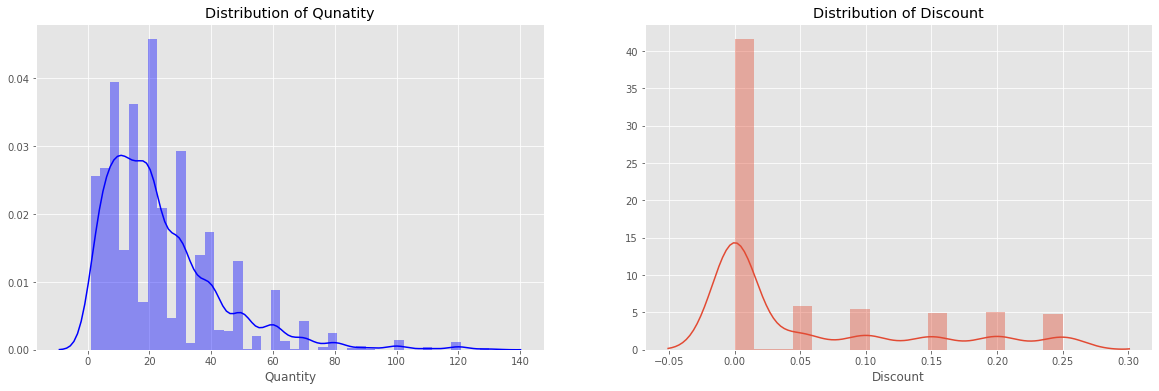

In [6]:
plt. figure(figsize=(20,6))

# Quantity:
plt.subplot(121)
sns.distplot(df_orders.Quantity, color='blue')
plt.title("Distribution of Qunatity")
plt.xlabel("Quantity")

# Discount:
plt.subplot(122)
sns.distplot(df_orders.Discount)
plt.title("Distribution of Discount")
plt.xlabel("Discount")

print("The different levels of discount are:", str(sorted(df_orders.Discount.unique())))

<b>Quantity</b>

From the above graphs it is observed that the distribution of the quantities is not a normal distribution. Being heavily positively skewed.

<b>Discount</b>

Only discounts of; 5%, 10%, 15%, 20% & 25% will be used due to the very low numbers of occurrences of the other discount levels. This will addressed when braking down by level of discount for the second part of the analysis.

## Discounted & Non-Discounted Investigation

### Discounted DataFrame

In [7]:
cur.execute("""SELECT Id, OrderId, ProductId, UnitPrice, Quantity, (UnitPrice*Quantity) AS TotalPrice, Discount, 
                ((UnitPrice*Quantity)*(1-Discount)) AS SalePrice
                FROM [OrderDetail]
                WHERE Discount > 0
                """)
df_Y_Discount = pd.DataFrame(cur.fetchall())
df_Y_Discount.columns = [x[0] for x in cur.description]
df_Y_Discount.describe()

,OrderId,ProductId,UnitPrice,Quantity,TotalPrice,Discount,SalePrice
count,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,10654.007160,39.844869,26.292363,27.109785,720.477303,0.144439,614.671157
std,235.887125,22.046812,30.017214,20.771439,1139.109460,0.071808,981.388386
min,10250.000000,1.000000,2.000000,1.000000,9.600000,0.010000,8.500000
25%,10452.250000,21.000000,12.500000,12.000000,192.000000,0.100000,162.000000
50%,10645.000000,40.000000,18.000000,20.000000,400.000000,0.150000,347.775000
75%,10847.000000,59.000000,31.230000,36.000000,819.000000,0.200000,693.600000
max,11077.000000,77.000000,263.500000,130.000000,15810.000000,0.250000,15019.500000


### Non-Discounted DataFrame

In [8]:
cur.execute("""SELECT Id, OrderId, ProductId, UnitPrice, Quantity, (UnitPrice*Quantity) AS TotalPrice, Discount, 
                ((UnitPrice*Quantity)*(1-Discount)) AS SalePrice
                FROM [OrderDetail]
                WHERE Discount = 0
                """)
df_N_Discount = pd.DataFrame(cur.fetchall())
df_N_Discount.columns = [x[0] for x in cur.description]
df_N_Discount.describe()

,OrderId,ProductId,UnitPrice,Quantity,TotalPrice,Discount,SalePrice
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.0,1317.000000
mean,10662.791951,41.396355,26.171534,21.715262,570.006538,0.0,570.006538
std,244.835366,22.217410,29.717354,17.507493,961.375030,0.0,961.375030
min,10248.000000,1.000000,2.000000,1.000000,4.800000,0.0,4.800000
25%,10448.000000,23.000000,12.000000,10.000000,142.500000,0.0,142.500000
50%,10671.000000,41.000000,18.400000,18.000000,325.000000,0.0,325.000000
75%,10879.000000,60.000000,32.800000,30.000000,640.000000,0.0,640.000000
max,11077.000000,77.000000,263.500000,130.000000,15810.000000,0.0,15810.000000


<b>Comparing Discounted and Non-Discounted Quantities by Product</b>

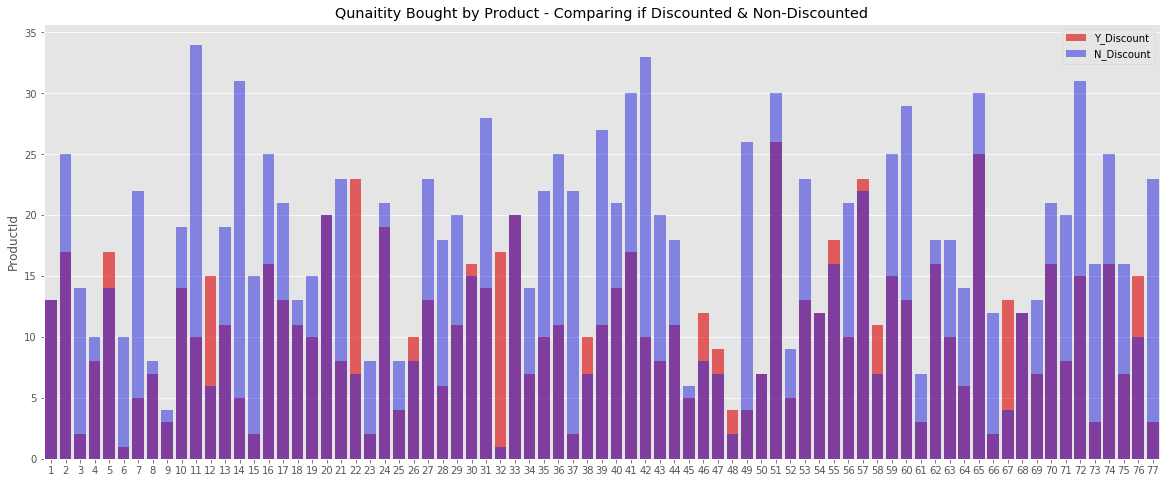

In [64]:
plt.figure(figsize=(20,8))
sns.barplot(x=df_Y_Discount.ProductId.unique(), 
            y=df_Y_Discount.ProductId.value_counts(), 
            color='red', 
            label="Y_Discount", 
            alpha=0.7)
sns.barplot(x=df_N_Discount.ProductId.unique(), 
            y=df_N_Discount.ProductId.value_counts(), 
            color='blue', 
            label="N_Discount", 
            alpha=0.5)
plt.title("Qunaitity Bought by Product - Comparing if Discounted & Non-Discounted")
plt.legend()
plt.show()

There are more non-discounted orders of products for the majority of items. However products; 32, 22, 67 & 12 have over 50% of their orders discounted.

<b>The Distribution Quantity Ordered</b>

Y_Discount Obs: 22718 
N_Discount Obs: 28599


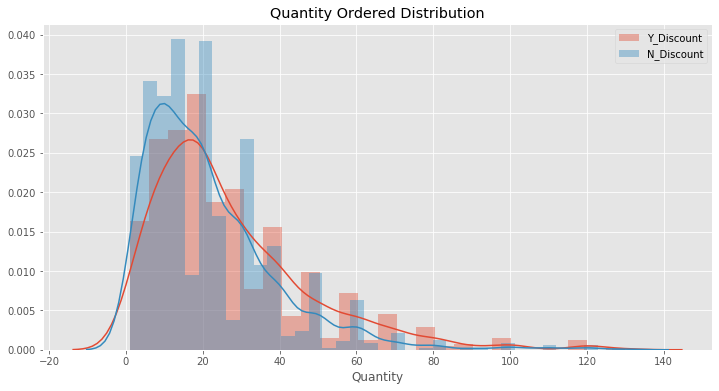

In [68]:
# Histograms 
print("Y_Discount Obs:", sum(df_Y_Discount.Quantity),"\nN_Discount Obs:", sum(df_N_Discount.Quantity))
plt.figure(figsize=(12,6))
sns.distplot(df_Y_Discount.Quantity, label="Y_Discount")
sns.distplot(df_N_Discount.Quantity, label="N_Discount")
plt.title("Quantity Ordered Distribution")
plt.legend()
plt.show()

In [10]:
print("Y_Discount:", stats.normaltest(df_Y_Discount.Quantity)) 
print("Skewness:", stats.skewtest(df_Y_Discount.Quantity), 
      "\nKurtosis:", stats.kurtosistest(df_Y_Discount.Quantity))
print("\nN_Discount:", stats.normaltest(df_N_Discount.Quantity))
print("Skewness:", stats.skewtest(df_N_Discount.Quantity), 
      "\nKurtosis:", stats.kurtosistest(df_N_Discount.Quantity))

Y_Discount: NormaltestResult(statistic=261.528012299789, pvalue=1.6214878452829618e-57)
Skewness: SkewtestResult(statistic=13.842653227648618, pvalue=1.409079317870628e-43) 
Kurtosis: KurtosistestResult(statistic=8.36115804891035, pvalue=6.210557830670977e-17)

N_Discount: NormaltestResult(statistic=544.5770045551502, pvalue=5.579637380545965e-119)
Skewness: SkewtestResult(statistic=19.36939831677361, pvalue=1.3988262245980647e-83) 
Kurtosis: KurtosistestResult(statistic=13.015506651733459, pvalue=9.987763752128882e-39)


Above Confirms that neither is a Normal Distribution as of the very high normal test values. Therefore, the Random Sample Method will be used.

This method takes random samples of values form the data and then uses the means of each these sample as the data points. Which due to the Central Limit Theorem will converge on a Normal Distribution. Allowing statistical analyses to be conducted.

### Random Sample Method

In [11]:
# Change to Numpy array's:
Y_Dis = np.array(df_Y_Discount.Quantity)
N_Dis = np.array(df_N_Discount.Quantity)

In [12]:
# Create the sample distrobutions:
Y_Discount = create_sample_distribution(Y_Dis, 1000, 50)
N_Discount = create_sample_distribution(N_Dis, 1000, 50)

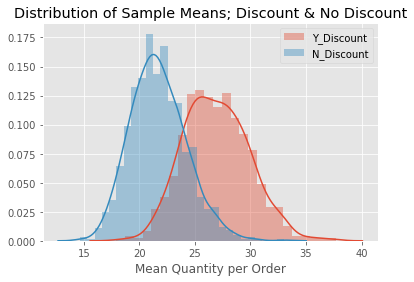

In [13]:
# Plot the Histograms of the means:
sns.distplot(Y_Discount, label="Y_Discount")
sns.distplot(N_Discount, label="N_Discount")
plt.title("Distribution of Sample Means; Discount & No Discount")
plt.xlabel("Mean Quantity per Order")
plt.legend()
plt.show()

### Two Sample T-Test.

In [69]:
print("Sample1 = N_Discount (Control)  Sample2 = Y_Discount (Experiment)\n")
two_sample_ttest(N_Discount, Y_Discount, 0.05)
ES, power = power_and_effect_size(N_Discount, Y_Discount, 0.05)
print("Cohen_d Effect Size:", ES, "\nPower:", power)

Sample1 = N_Discount (Control)  Sample2 = Y_Discount (Experiment)

Two Tail T-test:
---------------------------------------------------------------
Obs Number: Sample_1 = 1000   Sample_2 = 1000
Sample Means: Sample_1 = 21.714   Sample_2 = 26.934
Mean Differance: 5.22
---------------------------------------------------------------
t-crit: 1.9611520148367056 
t-stat: -42.81951601049339 
P-value: 8.309640175417624e-285 
Alpha(2-Tail): 0.025
---------------------------------------------------------------
|t_stat| > t_crit: True
P_value < Alpha(2-Tail): True

Reject Null_H! The results are statistically significant.
---------------------------------------------------------------
Cohen_d Effect Size: 1.91 
Power: 1.0


<b>Observations on Results</b>

If an item is discounted there is a large significant effect on the average item quantity.
    
There being an average 5.22 more item quantity for the discounted sales, compared to the non-discounted sales. The very large Cohen_d Effect Size of 1.91, along with the the incredibly small p-value, shows that the effect is a significant. 

<b>Further Questions</b>
- This could be due to the company giving larger item quantities a discount or discounted products are bought in larger quantities?
- It is also worth investigating whether specific companies are being discounted or if specific employees give more discounts out than others?

### Validation Above Results

Original Data - Using Scipy.Stats Welch's T-test for uneven samples:

In [18]:
stats.ttest_ind(N_Dis, Y_Dis, equal_var=False)

Ttest_indResult(statistic=-6.239069142123973, pvalue=5.65641429030433e-10)

Sampled Means Data:

In [15]:
stats.ttest_ind(N_Discount, Y_Discount, equal_var=True)

Ttest_indResult(statistic=-46.16566459681797, pvalue=2.707891e-317)

## What Levels of Discount have a Statistically Significant Effect on Quantity Ordered.

In this section I will use <b>ANOVA</b> to find out want discount level have have a statistically significant effect on quantity ordered. Firstly the discount values need to be; 0%, 5% , 10%, 15%, 20% & 25%. As mentioned earlier the low occurring discounts need to be converted to either 0% or 5%.

In [21]:
df_orders['Quantity'].groupby(df_orders['Discount']).describe()

,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
0.00,1317.0,21.715262,17.507493,1.0,10.0,18.0,30.0,130.0
0.01,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
0.02,2.0,2.000000,1.414214,1.0,1.5,2.0,2.5,3.0
0.03,3.0,1.666667,0.577350,1.0,1.5,2.0,2.0,2.0
0.04,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
0.05,185.0,28.010811,22.187685,1.0,14.0,20.0,40.0,120.0
0.06,1.0,2.000000,NaN,2.0,2.0,2.0,2.0,2.0
0.10,173.0,25.236994,21.186503,2.0,10.0,20.0,30.0,130.0
0.15,157.0,28.382166,20.923099,2.0,15.0,21.0,40.0,100.0


Conversion of the low occurrence:

[1%, 2%] =  0% 

[3%, 4%, 6%] = 5%

In [22]:
discount = df_orders['Discount']
dis = []
for d in discount:
    if d==0.01 or d==0.02:
        d=0
        dis.append(d)
    elif d==0.03 or d==0.04 or d==0.06:
        d=0.05
        dis.append(d)
    else:
        dis.append(d)

In [23]:
df_orders_anova = df_orders
df_orders_anova['Discount'] = dis
sorted(df_orders_anova['Discount'].unique())

[0.0, 0.05, 0.1, 0.15, 0.2, 0.25]

In [24]:
df_orders_anova['Quantity'].groupby(df_orders_anova['Discount']).describe()

,count,mean,std,min,25%,50%,75%,max
Discount,,,,,,,,
0.00,1320.0,21.670455,17.512817,1.0,10.0,18.0,30.00,130.0
0.05,190.0,27.315789,22.298961,1.0,12.0,20.0,35.75,120.0
0.10,173.0,25.236994,21.186503,2.0,10.0,20.0,30.00,130.0
0.15,157.0,28.382166,20.923099,2.0,15.0,21.0,40.00,100.0
0.20,161.0,27.024845,18.832801,2.0,12.0,21.0,40.00,100.0
0.25,154.0,28.240260,20.120570,2.0,15.0,25.0,36.00,120.0


In [25]:
from statsmodels.formula.api import ols
formula = 'Quantity ~ C(Discount) + C(ProductId)'  # Same as before but only considering the Supp varaible.
lm = ols(formula, df_orders_anova).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                     sum_sq      df         F        PR(>F)
C(Discount)    16607.572730     5.0  9.329873  8.403924e-09
C(ProductId)   24695.313562    76.0  0.912726  6.891652e-01
Residual      738005.751109  2073.0       NaN           NaN


Tukey HSD - MultiComparison Test: https://en.wikipedia.org/wiki/Tukey%27s_range_test

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0   0.05   5.6453 0.0016   1.476  9.8147   True
   0.0    0.1   3.5665 0.1778 -0.7782  7.9113  False
   0.0   0.15   6.7117  0.001  2.1754  11.248   True
   0.0    0.2   5.3544 0.0088  0.8688    9.84   True
   0.0   0.25   6.5698  0.001  1.9942 11.1454   True
  0.05    0.1  -2.0788    0.9 -7.7256   3.568  False
  0.05   0.15   1.0664    0.9  -4.729  6.8618  False
  0.05    0.2  -0.2909    0.9 -6.0468  5.4649  False
  0.05   0.25   0.9245    0.9 -4.9018  6.7507  False
   0.1   0.15   3.1452 0.6342 -2.7777   9.068  False
   0.1    0.2   1.7879    0.9 -4.0963   7.672  False
   0.1   0.25   3.0033 0.6779 -2.9498  8.9563  False
  0.15    0.2  -1.3573    0.9 -7.3843  4.6696  False
  0.15   0.25  -0.1419    0.9 -6.2361  5.9523  False
   0.2   0.25   1.2154    0.9 -4.8412   7.272  False
----------------------------------------------

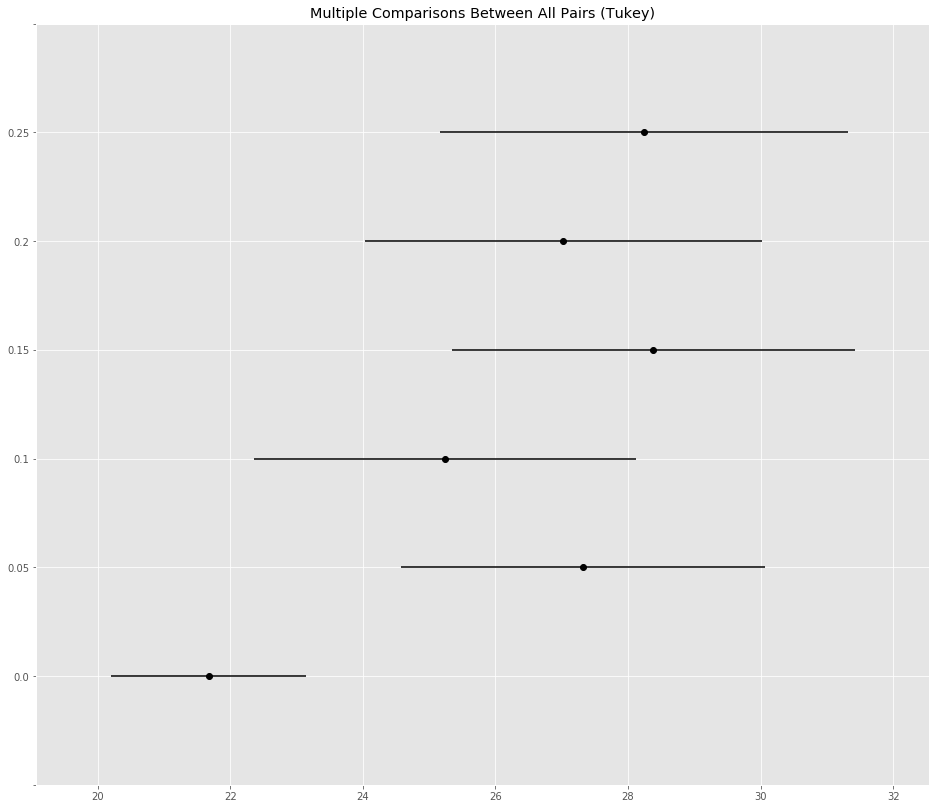

In [26]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df_orders_anova['Quantity'], df_orders_anova['Discount'])
mc_results = mc.tukeyhsd() # Default is 5% alpha
print(mc_results)

mc_results = mc_results.plot_simultaneous(figsize=(16,14))
plt.show()

<b>Observations</b>

* Discount has a significant effect (other than 1% discount) over no discount, on quantity ordered.
* Discount to discount has no significant effect of quantity order when compared to each other.
